In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
classif = pd.Series(["Original Data", "All Paraphrases", "Similarity < 0.8", "Similarity < 0.4", 
                    "4 Least Similar", "2 Least Similar"])

results = pd.Series([0.753,0.696,0.66,0.6969,0.7385,0.7429])

In [3]:
res = pd.DataFrame([classif, results])

In [4]:
res.head()

,0,1,2,3,4,5
0,Original Data,All Paraphrases,Similarity < 0.8,Similarity < 0.4,4 Least Similar,2 Least Similar
1,0.753,0.696,0.66,0.6969,0.7385,0.7429


In [2]:
lowest_two = pd.read_csv("lowest_two_of_20_new_datasets.csv").sort_values(['Unnamed: 1', 'f1'], ascending=False)
origs = pd.read_csv("../../CUI_23/metrics/new/Sentence_test_sets_metrics.csv").sort_values(['Unnamed: 1', 'f1'], ascending=False)
lower_4 = pd.read_csv("lower_4_20_new_datasets.csv").sort_values(['Unnamed: 1', 'f1'], ascending=False)

In [3]:
rows = ["GLoHBCD", "Instagram Data", "Smoke Stop Forum", "Synthetic GPT3 Data", "Health Coach Dialogue Corpus", "DARN-CT-based Wizard of Oz Dialogues", "Optifast Mock-Chatbot"]

origs = origs[origs["Unnamed: 1"].isin(rows)].copy()
origs.head()

,Unnamed: 0,Unnamed: 1,accuracy,f1,precision,recall
44,2,Synthetic GPT3 Data,0.945946,0.942735,0.921569,0.975309
156,9,Synthetic GPT3 Data,0.945946,0.920635,0.891667,0.955840
76,4,Synthetic GPT3 Data,0.932432,0.907486,0.875000,0.949668
92,5,Synthetic GPT3 Data,0.932432,0.907486,0.875000,0.949668
12,0,Synthetic GPT3 Data,0.918919,0.894930,0.860294,0.943495


In [4]:
lowest_two["classif"] = "Paraphrases with lowest similarity"
lower_4["classif"] = "Paraphrases with similarity < 0.4"
origs["classif"] = "Original"

all_dat = pd.concat([origs, lowest_two, lower_4])
all_dat.head()

,Unnamed: 0,Unnamed: 1,accuracy,f1,precision,recall,classif
44,2,Synthetic GPT3 Data,0.945946,0.942735,0.921569,0.975309,Original
156,9,Synthetic GPT3 Data,0.945946,0.920635,0.891667,0.955840,Original
76,4,Synthetic GPT3 Data,0.932432,0.907486,0.875000,0.949668,Original
92,5,Synthetic GPT3 Data,0.932432,0.907486,0.875000,0.949668,Original
12,0,Synthetic GPT3 Data,0.918919,0.894930,0.860294,0.943495,Original


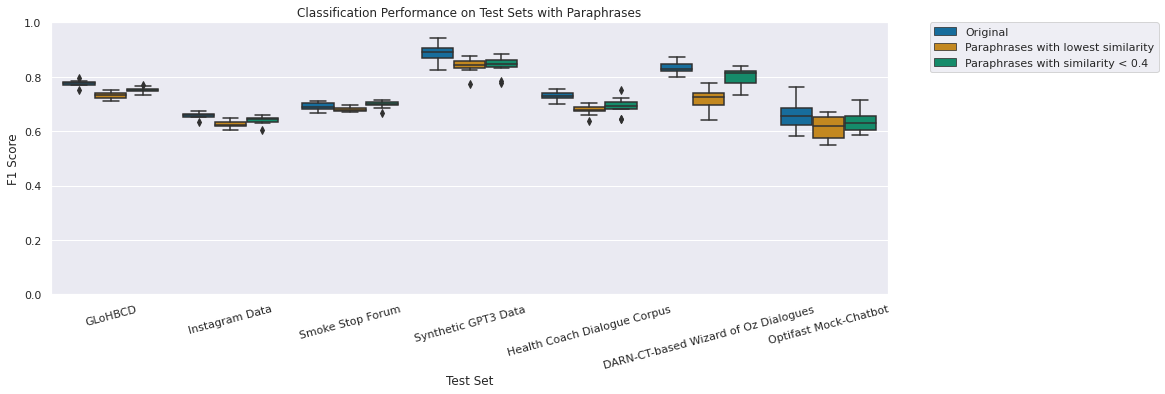

In [6]:
sns.set(rc={"figure.figsize":(15, 5)})
sns.set_palette("colorblind")
ax = sns.boxplot(x="Unnamed: 1", y="f1", hue="classif", data=all_dat, order=rows)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Classification Performance on Test Sets with Paraphrases")
plt.xlabel("Test Set")
plt.ylabel("F1 Score")
#plt.huelabel("Test Set")
plt.ylim(0,1)
#plt.style.use("dark_background")
plt.xticks(rotation = 15)
plt.savefig("paraphrasing_performance.png", bbox_inches="tight")
plt.show()